this notebook we will show that brain tumor detection model can be done using mobile device algorithm. Mobilenet V3 is the latest version of mobilenet family with the highest accuracy but low parameters. happy reading!
https://www.kaggle.com/code/ardhikamalhaq/brain-tumor-detection-with-mobilenet-v3/notebook

In [6]:
import os
import pandas as pd
import numpy as np
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.patches as mpatches
from sklearn.utils import shuffle
from tqdm import tqdm

In [3]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [4]:
!pip install kaggle

In [7]:
import zipfile
# Using raw string literal for the path
with zipfile.ZipFile(r'C:\Users\MSI\archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')  # Extract to the current directory

In [3]:
import zipfile
from IPython.display import Image

# Path to the zip file
zip_file_path = r'C:\Users\MSI\archive.zip'

# Directory to extract to
extract_dir = './extracted_files/'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)  # Extract to the specified directory

# List files in the extracted directory
extracted_files = os.listdir(extract_dir)
print(extracted_files)  # This will print the names of the files inside the extracted folder

['.ipynb_checkpoints', 'Brain Tumor', 'Brain Tumor.csv', 'bt_dataset_t3.csv']


In [7]:
import os
image_path = os.path.join(extract_dir, 'Brain Tumor','Brain Tumor', 'Image5.jpg')

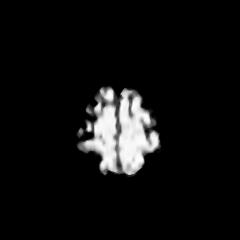

In [8]:
Image(image_path, width=600, height=600)

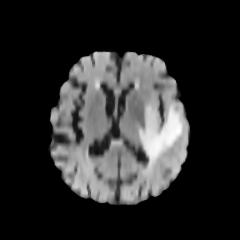

In [26]:
from IPython.display import Image
Image("./extracted_files/Brain Tumor/Brain Tumor/Image4.jpg",width=600, height=600)

# **<span style="color:#DD3322;">1. Importing Packages</span>**

- We start with importing all libraries that are needed.

In [9]:
import os

main_dir = r'C:\Users\MSI\Downloads\archive'  # Replace if needed

print("Trying to access:", main_dir)

if os.path.exists(main_dir):
    os.chdir(main_dir)
    print("✅ Working directory changed to:", os.getcwd())
else:
    print("❌ Directory not found:", main_dir)


Trying to access: C:\Users\MSI\Downloads\archive
✅ Working directory changed to: C:\Users\MSI\Downloads\archive


In [ ]:
#C:\Users\MSI\Downloads\archive.zip
#main_dir  = '/kaggle/input/brain-tumor/'
#os.chdir(main_dir)

In [44]:
#import pandas as pd
# Correct file path (Update this to the actual path of your file)
#file_path = r'C:\Users\MSI\Downloads\archive/Brain Tumor.csv'  # Update this as needed
# Read the CSV and select columns
#df = pd.read_csv(file_path)[['Image', 'Class']]
# Display the first few rows of the dataframe
#display(df.head())
# Print the shape of the dataframe
#print(df.shape)

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


(3762, 2)


In [10]:
df = pd.read_csv("Brain Tumor.csv")[['Image', 'Class']]
display(df.head())
print(df.shape)

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


(3762, 2)


# **<span style="color:#DD3322;">2. Managing Images into part of Training, Validation, and Testing</span>**

- Divide files into training, validation, and testing with proportion :
1. Training : 0.8
2. Validation : 0.1
3. testing : 0.1

In [11]:
# Split Training + Validation with Testing Set
def split_size(df, size):
    return int(size * len(df))


train_labels = df['Class'].values[:split_size(df, 0.8)]
train_file_names = df['Image'].values[:split_size(df, 0.8)]

val_labels = df['Class'].values[split_size(df, 0.8):split_size(df, 0.9)]
val_file_names = df['Image'].values[split_size(df, 0.8):split_size(df, 0.9)]

test_labels = df['Class'].values[split_size(df, 0.9):]
test_file_names = df['Image'].values[split_size(df, 0.9):]

In [12]:
def split_array_labels(arr_image, arr_label):
    arr_image_0 = arr_image[np.where(arr_label==0)]
    arr_image_1 = arr_image[np.where(arr_label==1)]
    return {'0':arr_image_0, '1':arr_image_1}

In [13]:
train_arr_dict = split_array_labels(train_file_names, train_labels)
val_arr_dict = split_array_labels(val_file_names, val_labels)
test_arr_dict = split_array_labels(test_file_names, test_labels)

# Create the space for training, validation, and testing by creating an empty space

In [14]:
def create_empty_directories(main_dir):
    # in case you want to run it several times, delete the directory and create new one
    check_exist_path = os.path.join(main_dir, '_MODELLING')
    if os.path.isdir(check_exist_path):
        shutil.rmtree(check_exist_path)
        print("Remove old directories")
    
    for label in ['0','1']:
        training_dir = os.path.join(main_dir, '_MODELLING', 'training', label)
        validation_dir = os.path.join(main_dir, '_MODELLING', 'validation', label)
        testing_dir = os.path.join(main_dir, '_MODELLING', 'testing', label)
        
        
        
        os.makedirs(training_dir)
        os.makedirs(validation_dir)
        os.makedirs(testing_dir)
    print(f"Created empty  training, validation and testing directories")
create_empty_directories('/kaggle/working')

Created empty  training, validation and testing directories


# split images by copying and pasting into specific directiories

In [15]:
def split_data(SOURCE_DIR, train_arr_dict, val_arr_dict, test_arr_dict):
    for label in tqdm(['0','1']):
        for file_name in train_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'Brain Tumor', 'Brain Tumor', file_name)
            destination = os.path.join('/kaggle/working', '_MODELLING', 'training', label, file_name)
            copyfile(source, destination)

        for file_name in val_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'Brain Tumor', 'Brain Tumor', file_name)
            destination = os.path.join('/kaggle/working', '_MODELLING', 'validation', label, file_name)
            copyfile(source, destination)
        
        for file_name in test_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'Brain Tumor', 'Brain Tumor', file_name)
            destination = os.path.join('/kaggle/working', '_MODELLING', 'testing', label, file_name)
            copyfile(source, destination)
    print(f"Created training, validation and testing directories containing images")
    
split_data(main_dir,train_arr_dict,val_arr_dict,test_arr_dict)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.77s/it]

Created training, validation and testing directories containing images


# **<span style="color:#DD3322;">3. Show Number of Images per Category</span>**

In [16]:
main_dir  = '/kaggle/working/_MODELLING'
os.chdir(main_dir)

mytrain_test_list = []
mylabels_list = []
myitem_list = []
vis_images = []; vis_labels =[]

train_test_list = tf.io.gfile.listdir(main_dir)
for train_test in train_test_list:
    path1 = os.path.join(main_dir, train_test)
    label_list = tf.io.gfile.listdir(path1)
    for label in label_list:
        my_path = os.path.join(path1, label)
        item_files = os.listdir(my_path)

        mytrain_test_list.append(train_test)
        mylabels_list.append(label)
        myitem_list.append(len(item_files))
        
        my_files = item_files[0:5]
        for file in my_files:
            vis_images.append(os.path.join(my_path, file))
            vis_labels.append(label)
        
pd.DataFrame({'Tran Test':mytrain_test_list, 'Labels':mylabels_list, \
              'Number of Items':myitem_list})

,Tran Test,Labels,Number of Items
0,testing,0,138
1,testing,1,239
2,training,0,1822
3,training,1,1187
4,validation,0,119
5,validation,1,257


# **<span style="color:#DD3322;">4. Display Sample images of each label</span>**

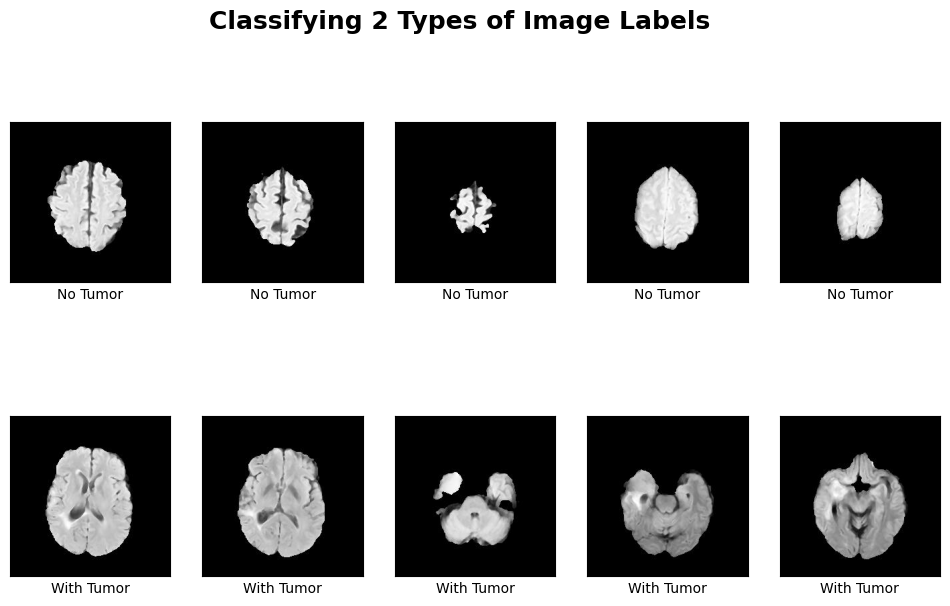

In [17]:
# get first 10 images for visualisation
vis_images = vis_images[:10]
vis_labels = vis_labels[:10]

plt.figure(figsize=(12,7))
for i in range(len(vis_labels)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = mpimg.imread(vis_images[i])
    plt.imshow(img)
    
    if vis_labels[i] == '0':
        my_label = 'No Tumor'
    elif vis_labels[i] == '1':
        my_label = 'With Tumor'
    
    plt.xlabel(my_label)
    plt.suptitle(f"Classifying 2 Types of Image Labels",fontsize=18, fontweight='bold')
plt.show()

# **<span style="color:#DD3322;">5. Display Augmented image to reduce overfitting</span>**

Data augmentation is very useful especially when applied to real-world applications

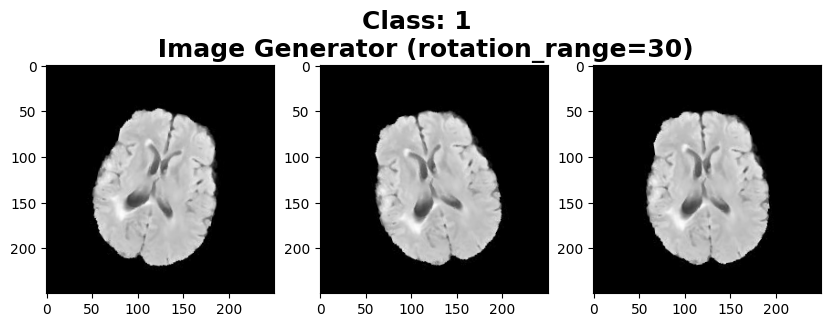

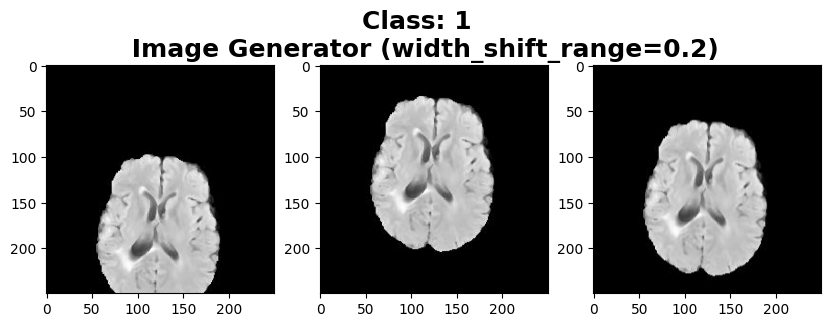

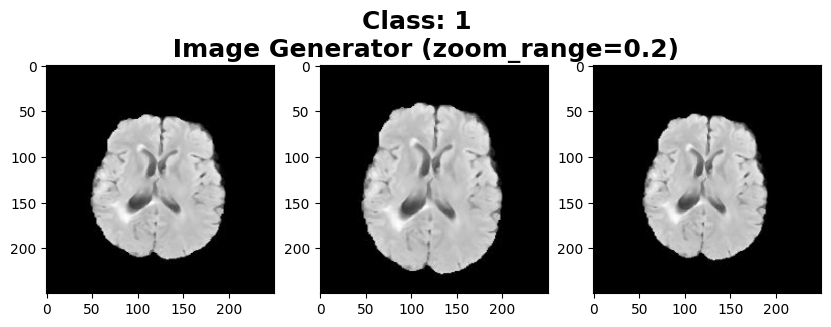

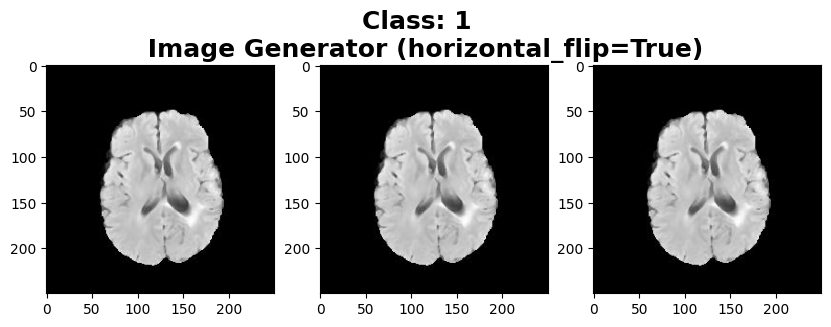

In [19]:
def show_ImageDataGenerator(vis_images, vis_labels, image_index):
    #Loads image in from the set image path
    class_label = vis_labels[image_index]
    img = tf.keras.preprocessing.image.load_img(vis_images[image_index], target_size= (250,250))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    #Creates our batch of one image
    def show_image(datagen, param):
        pic = datagen.flow(img_tensor, batch_size =1)
        plt.figure(figsize=(10,3.5))
        #Plots our figures
        for i in range(1,4):
            plt.subplot(1, 3, i)
            batch = next(pic)
           # batch = pic.next()
            image_ = batch[0].astype('uint8')
            plt.imshow(image_)
        plt.suptitle(f"Class: {class_label} \n Image Generator ({param})",fontsize=18, fontweight='bold')

        plt.show()

    datagen = ImageDataGenerator(rotation_range=30)
    show_image(datagen, "rotation_range=30")

    datagen = ImageDataGenerator(width_shift_range=0.2)
    show_image(datagen, "width_shift_range=0.2")

    datagen = ImageDataGenerator(zoom_range=0.2)
    show_image(datagen, "zoom_range=0.2")

    datagen = ImageDataGenerator(horizontal_flip=True)
    show_image(datagen, "horizontal_flip=True")

show_ImageDataGenerator(vis_images, vis_labels, image_index = 5)

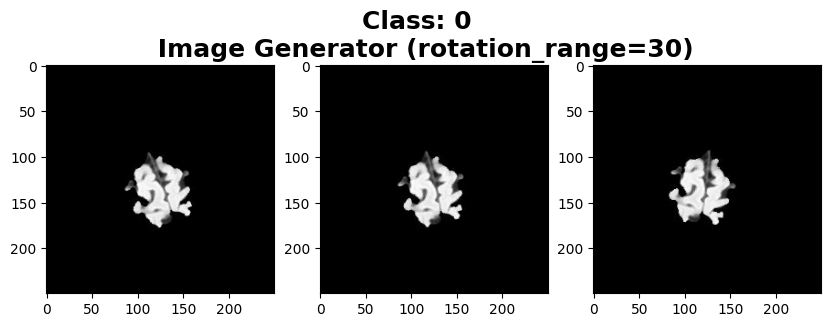

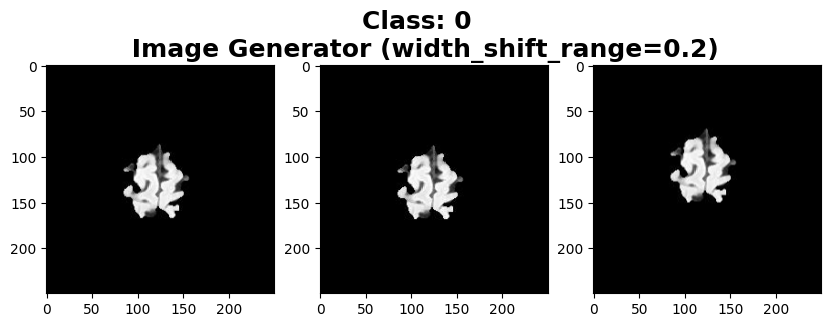

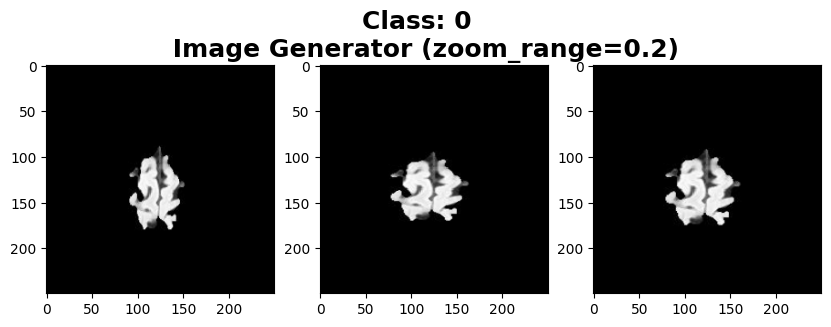

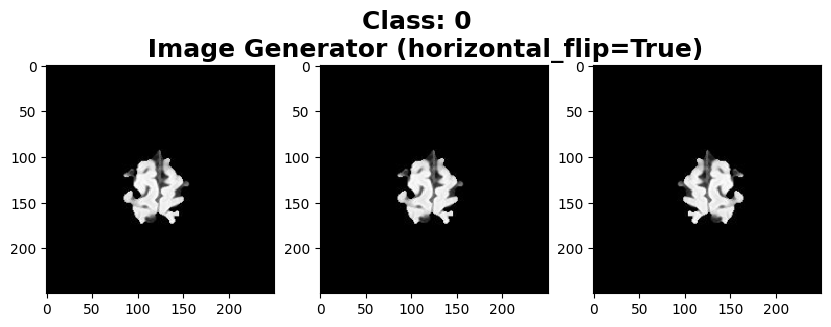

In [20]:
show_ImageDataGenerator(vis_images, vis_labels, image_index = 2)

# **<span style="color:#DD3322;">6. Apply image augmentation</span>**

In [21]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):

    # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
    train_datagen = ImageDataGenerator(rescale=1./127.5,
                                     rotation_range=30,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    valid_or_test_datagen = ImageDataGenerator(rescale=1./127.5)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = valid_or_test_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    
    test_generator = valid_or_test_datagen.flow_from_directory(directory=TEST_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    return train_generator, validation_generator, test_generator

In [22]:
training_dir = os.path.join(main_dir, 'training')
validation_dir = os.path.join(main_dir, 'validation')
testing_dir = os.path.join(main_dir, 'testing')

print(testing_dir)

/kaggle/working/_MODELLING\testing


In [23]:
train_generator, validation_generator, test_generator = train_val_generators(training_dir, validation_dir, testing_dir)

Found 3009 images belonging to 2 classes.
Found 376 images belonging to 2 classes.
Found 377 images belonging to 2 classes.


# **<span style="color:#DD3322;">7. Matching the model - Mobilenet V3</span>**

MobileNetV3 uses a combination of several building blocks called "mobile inverted residual blocks" (MBConv) to build the neural network. These blocks consist of a depthwise separable convolution followed by a linear bottleneck and a non-linear activation function.

The main innovations in MobileNetV3 are as follows:

1. The use of an activation function called Swish, which has been shown to outperform the widely used ReLU activation function in terms of accuracy.

2. The use of an improved version of the MBConv block called the "efficient head block" which adds an extra layer of depthwise convolution to the MBConv block to improve accuracy.

3. The use of a technique called "hard-swish" which replaces the sigmoid function in the MBConv block with a faster and more efficient piecewise linear approximation.

4. The use of a technique called "squeeze-and-excitation" which uses a small number of parameters to adaptively adjust the importance of each feature map in the network.

In [24]:
main_model = tf.keras.applications.MobileNetV3Large(input_shape=(150, 150, 3),
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,)

main_model.trainable = False
last_output = main_model.output
num_trainable_params = sum([w.shape.num_elements() for w in main_model.trainable_weights])

print(f"There are {num_trainable_params:,} trainable parameters in this model.")
print(f"The pretrained model has type: {type(main_model)}")

C:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\keras\src\applications\mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


22661472/22661472 ━━━━━━━━━━━━━━━━━━━━ 22s 1us/step
There are 0 trainable parameters in this model.
The pretrained model has type: <class 'keras.src.models.functional.Functional'>


# **<span style="color:#DD3322;">8. Constructing Deep Neural Network with MobilenetV3</span>**

In [25]:
def transfer_learning(last_output, pre_trained_model):
    # Flatten the output layer to 1 dimension
    x = tf.keras.layers.Flatten()(last_output)
    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    # Add a dropout rate of 0.7
    x = tf.keras.layers.Dropout(0.7)(x)  
    # Add a final sigmoid layer for classification
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)          
    # Create the complete model by using the Model class
    model = Model(inputs=pre_trained_model.input, outputs=x)
    
    return model

model = transfer_learning(last_output, main_model)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 150, 150, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv (Conv2D)                 │ (None, 75, 75, 16)        │             432 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_bn (BatchNormalization)  │ (None, 75, 75, 16)        │              64 │ conv[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 75, 75, 16)        │               0 │ conv_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 16)        │             144 │ activation[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_bn    │ (None, 75, 75, 16)        │              64 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu (ReLU)                  │ (None, 75, 75, 16)        │               0 │ expanded_conv_depthwise_b… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             256 │ re_lu[0][0]                │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_bn      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_add (Add)       │ (None, 75, 75, 16)        │               0 │ activation[0][0],          │
│                               │                           │                 │ expanded_conv_project_bn[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_1_expand        │ (None, 75, 75, 64)        │           1,024 │ expanded_conv_add[0][0]    │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_1_expand_bn     │ (None, 75, 75, 64)        │             256 │ expanded_conv_1_expand[0]… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_1 (ReLU)                │ (None, 75, 75, 64)        │               

 Total params: 6,533,481 (24.92 MB)

 Trainable params: 1,026,049 (3.91 MB)

 Non-trainable params: 5,507,432 (21.01 MB)

In [26]:
model = transfer_learning(last_output, main_model)

print(f"Total Trainable Variables: {len(model.trainable_variables)}")

Total Trainable Variables: 4


In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [28]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0003),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [30]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[callback])

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.6089 - loss: 0.6498 - val_accuracy: 0.3165 - val_loss: 0.8243
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.6060 - loss: 0.6492 - val_accuracy: 0.3165 - val_loss: 0.8371
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.6064 - loss: 0.6449 - val_accuracy: 0.3165 - val_loss: 0.8444
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.6011 - loss: 0.6461 - val_accuracy: 0.3165 - val_loss: 0.8662


In [ ]:
def vis_evaluation(history_dict, model_name):
    # Create a subplot with 1 row and 2 columns (for Accuracy and Loss)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

    # Generate a range of epoch numbers based on training history
    epochs = range(1, len(history_dict['accuracy']) + 1)

    # Helper function to calculate the gradient (rate of change) over training epochs
    def get_gradient(y_arr, epochs):
        return round((y_arr[-1] - y_arr[0]) / (epochs[-1] - epochs[0]), 2)

    # Function to visualize either Accuracy or Loss
    def vis_sub_evaluation(n, Accuracy, train_acc, val_acc, epochs):
        # Plot training and validation curves
        axs[n].plot(epochs, train_acc, label=f'Training {Accuracy}', ls='--')
        axs[n].plot(epochs, val_acc, label=f'Validation {Accuracy}', ls='dotted')

        # Set titles and labels
        axs[n].set_title(f'Training and Validation {Accuracy}')
        axs[n].set_xlabel('Epochs')
        axs[n].set_ylabel(Accuracy)

        # Add legend with gradient label
        handles, labels = axs[n].get_legend_handles_labels()
        m_patch = mpatches.Patch(color='grey', label='m: gradient')
        handles.append(m_patch)
        axs[n].legend(handles=handles)

        # Function to annotate the end point of the training and validation curves with gradient info
        def annotate_box(train_acc):
            return AnnotationBbox(
                TextArea(f"m = {get_gradient(train_acc, epochs)}"),
                (epochs[-1], train_acc[-1]),
                xybox=(20, 20),
                xycoords='data',
                boxcoords="offset points",
                arrowprops=dict(arrowstyle="->")
            )

        # Add annotations for both training and validation gradients
        axs[n].add_artist(annotate_box(train_acc))
        axs[n].add_artist(annotate_box(val_acc))

    # Extract accuracy data from training history
    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    vis_sub_evaluation(0, 'Accuracy', train_acc, val_acc, epochs)

    # Extract loss data from training history
    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    vis_sub_evaluation(1, 'Loss', train_loss, val_loss, epochs)

    # Set the main title of the figure
    plt.suptitle(f"Performance Evaluation of {model_name}", fontsize=18, fontweight='bold')
    
    # Display the plots
    plt.show()

# Usage Example: Visualize training history of MobileNetV3
history_dict_1 = history.history
vis_evaluation(history_dict_1, 'Transfer Learning MobileNetV3Large')

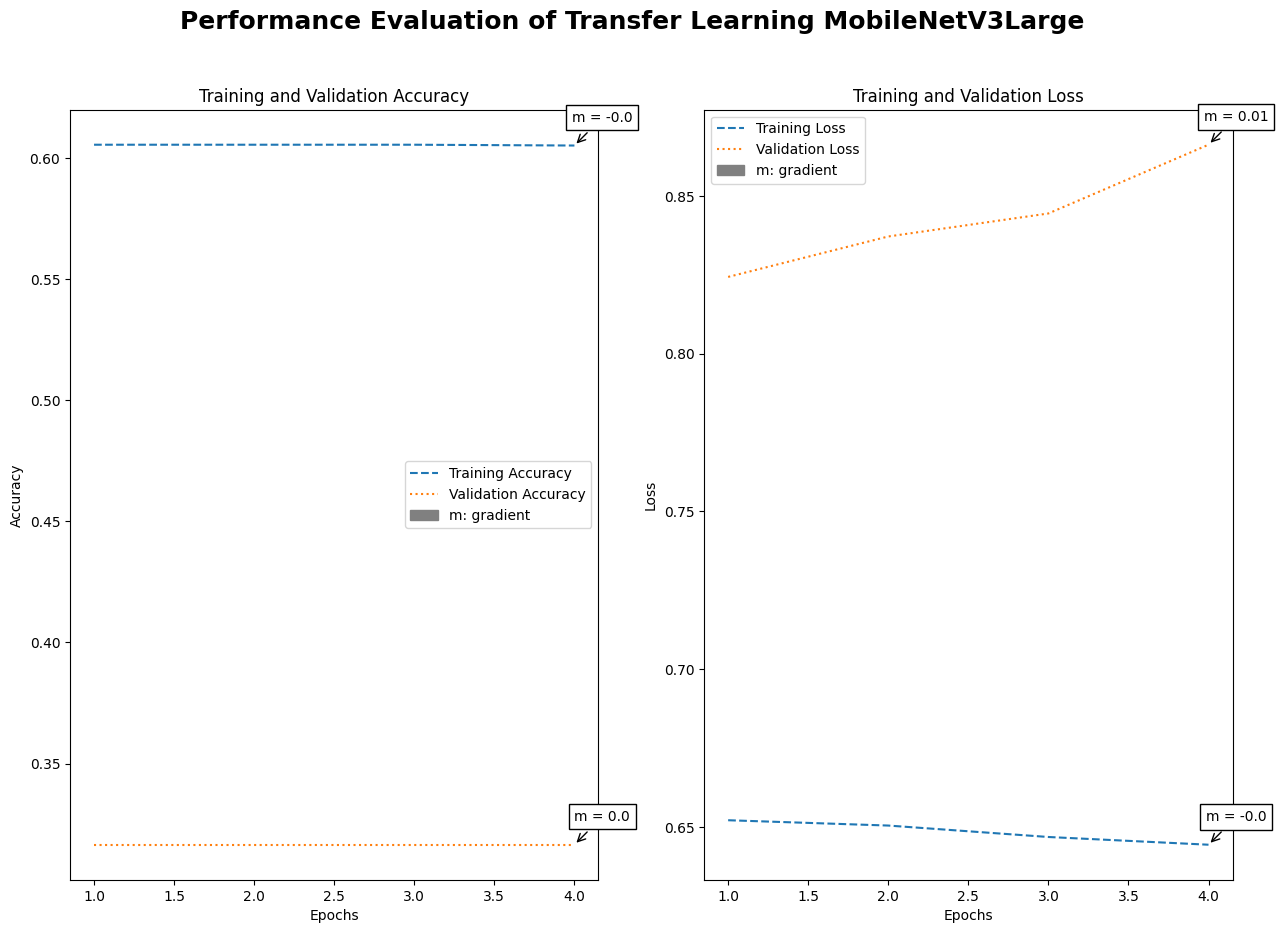

In [31]:
def vis_evaluation(history_dict, model_name):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    epochs = range(1, len(history_dict['accuracy'])+1)

    def get_gradient(y_arr, epochs):
        return round((y_arr[-1] - y_arr[0]) / (epochs[-1] - epochs[0]),2)

    def vis_sub_evaluation(n, Accuracy, train_acc, val_acc, epochs):
        axs[n].plot(epochs, train_acc, label=f'Training {Accuracy}', ls='--')
        axs[n].plot(epochs, val_acc, label=f'Validation {Accuracy}', ls='dotted')

        axs[n].set_title(f'Training and Validation {Accuracy}')
        axs[n].set_xlabel('Epochs')
        axs[n].set_ylabel(Accuracy)
        
        handles, labels = axs[n].get_legend_handles_labels()
        m_patch = mpatches.Patch(color='grey',label='m: gradient')
        handles.append(m_patch) 
        axs[n].legend(handles=handles)
        
        def annotate_box(train_acc):
            return AnnotationBbox(TextArea(f"m = {get_gradient(train_acc, epochs)}"), (epochs[-1], train_acc[-1]),
                            xybox=(20, 20),
                            xycoords='data',
                            boxcoords="offset points",
                            arrowprops=dict(arrowstyle="->"))
        axs[n].add_artist(annotate_box(train_acc))
        axs[n].add_artist(annotate_box(val_acc))

    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    vis_sub_evaluation(0, 'Accuracy', train_acc, val_acc, epochs)

    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    vis_sub_evaluation(1, 'Loss', train_loss, val_loss, epochs)
    
    plt.suptitle(f"Performance Evaluation of {model_name}",fontsize=18, fontweight='bold')
    plt.show()
    
history_dict_1 = history.history
vis_evaluation(history_dict_1, 'Transfer Learning MobileNetV3Large')

# **<span style="color:#DD3322;">9. Fine Tuning Transfer learning model</span>**

Fine-tuning is a technique used in transfer learning where a pre-trained model is further trained on a new task or dataset by adjusting its parameters to fit the new data. In fine-tuning, the pre-trained model acts as a starting point and the goal is to adapt the model to the new task, rather than training a new model from scratch.

The process of fine-tuning involves taking the pre-trained model and adding one or more layers on top of it that are specific to the new task. These layers are then trained on the new data, while the weights of the pre-trained layers are frozen or partially updated to retain their learned features. This allows the model to adapt to the new task while still retaining the general knowledge learned from the pre-training.

In [32]:
main_model.trainable = True
# Let's take a look to see how many layers are in the main model
print("Number of layers in the main model: ", len(main_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in main_model.layers[:fine_tune_at]:
    layer.trainable = False
    
print(f"Total Trainable Variables: {len(model.trainable_variables)}")

Number of layers in the main model:  194
Total Trainable Variables: 85


In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001/10),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [34]:
history_fine = model.fit(train_generator,
                         epochs=15,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_generator)

Epoch 4/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 233ms/step - accuracy: 0.6232 - loss: 0.6416 - val_accuracy: 0.3165 - val_loss: 0.8408
Epoch 5/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.6535 - loss: 0.5547 - val_accuracy: 0.3431 - val_loss: 0.7852
Epoch 6/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.8293 - loss: 0.4229 - val_accuracy: 0.4415 - val_loss: 0.7356
Epoch 7/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.8501 - loss: 0.3899 - val_accuracy: 0.5186 - val_loss: 0.7077
Epoch 8/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.8649 - loss: 0.3610 - val_accuracy: 0.5559 - val_loss: 0.6863
Epoch 9/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.8926 - loss: 0.3268 - val_accuracy: 0.5957 - val_loss: 0.6621
Epoch 10/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.8836 - loss: 0.3333 - val_accuracy: 0.6356 - val_loss: 0.6439
Epoch 11/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.8924 - loss: 0.3244 - val_ac

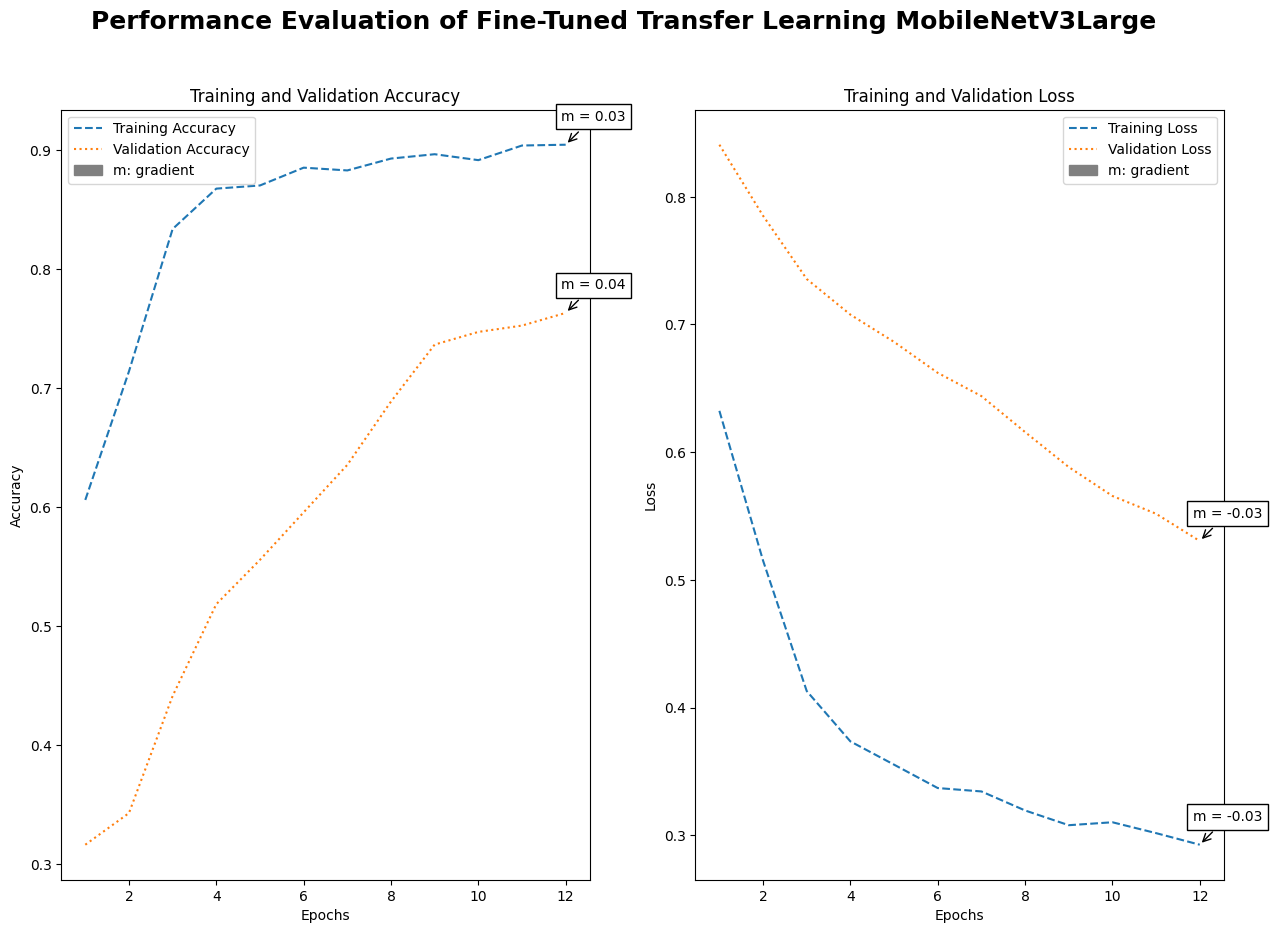

In [35]:
history_dict_2 = history_fine.history
vis_evaluation(history_dict_2, 'Fine-Tuned Transfer Learning MobileNetV3Large')

# **<span style="color:#DD3322;">10. Evaluation on Accuracy</span>**

In [36]:
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy :', accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8071 - loss: 0.4901 
Test accuracy : 0.8196286559104919


# **<span style="color:#DD3322;">11. Display Predictions with builded model</span>**

In [37]:
selected_paths = [] ; selected_labels = []
testing_path_0 = os.path.join(main_dir, 'testing', '0')
for x in random.sample(os.listdir(testing_path_0),10):
    selected_paths.append(os.path.join(testing_path_0, x))
    selected_labels.append(0)

testing_path_1 = os.path.join(main_dir, 'testing', '1')
for x in random.sample(os.listdir(testing_path_1),10):
    selected_paths.append(os.path.join(testing_path_1, x))
    selected_labels.append(1)

In [38]:
X, y = shuffle(selected_paths, selected_labels, random_state=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


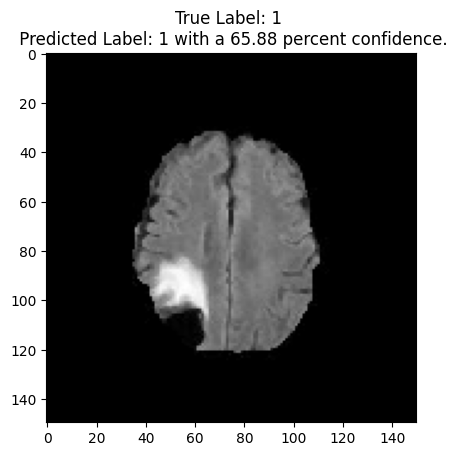

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


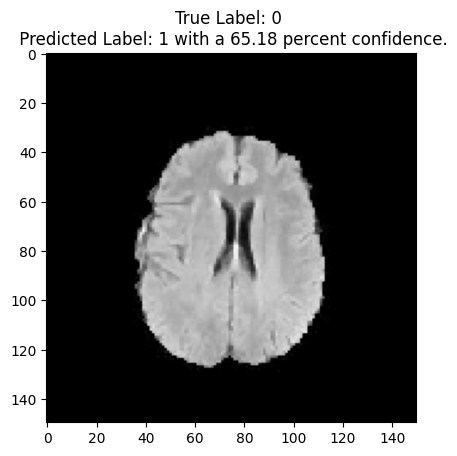

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


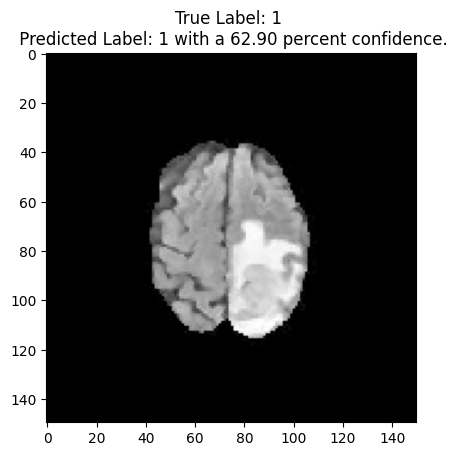

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


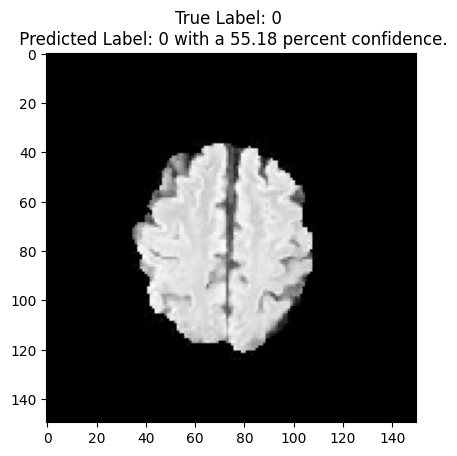

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


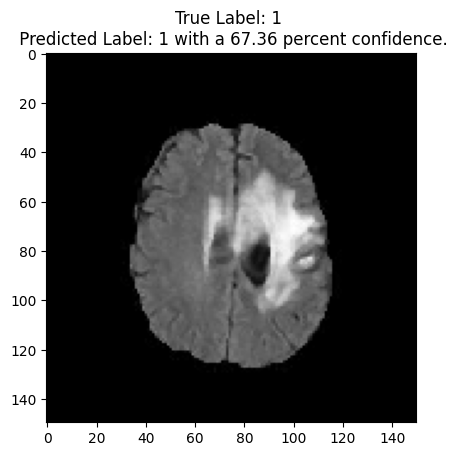

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


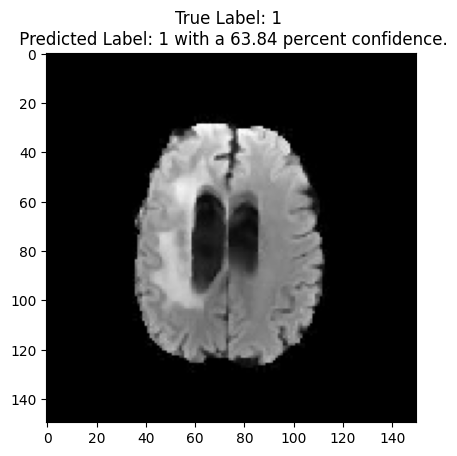

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


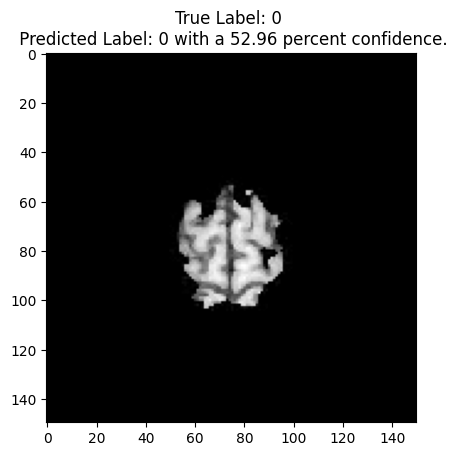

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


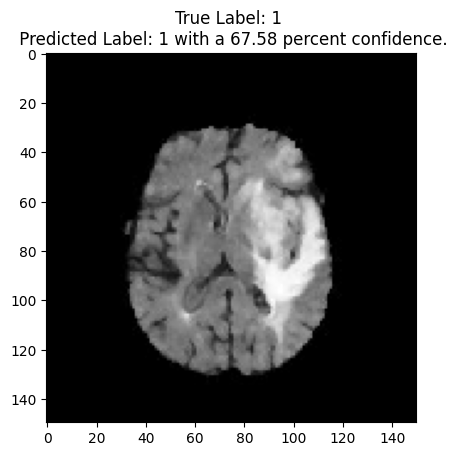

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


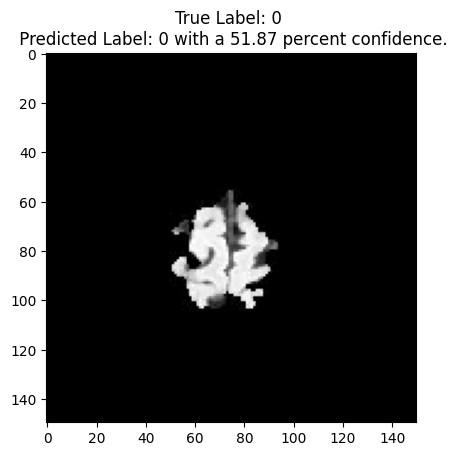

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


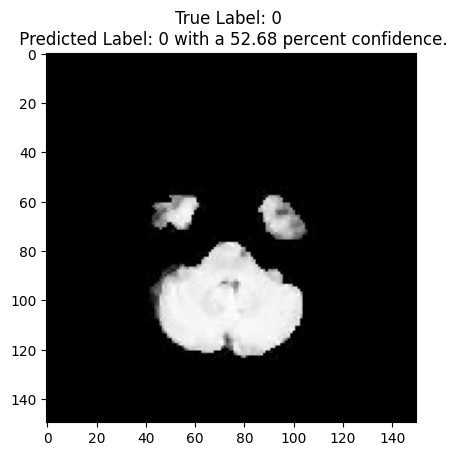

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


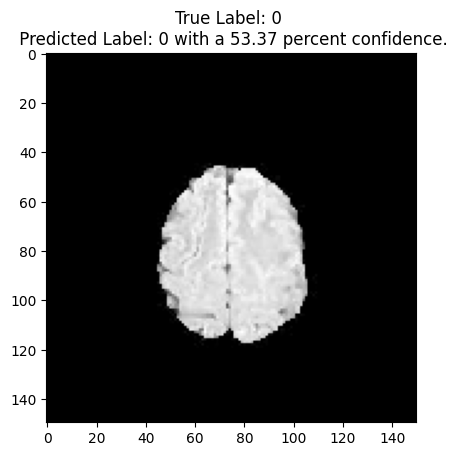

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


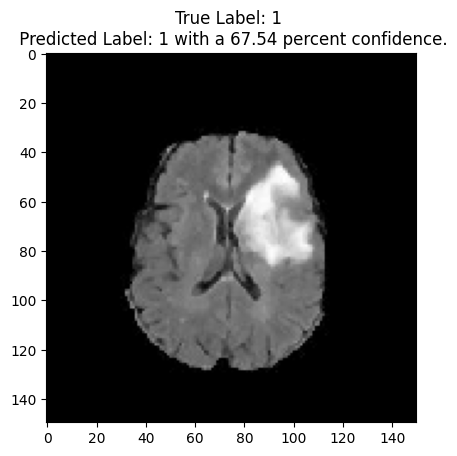

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


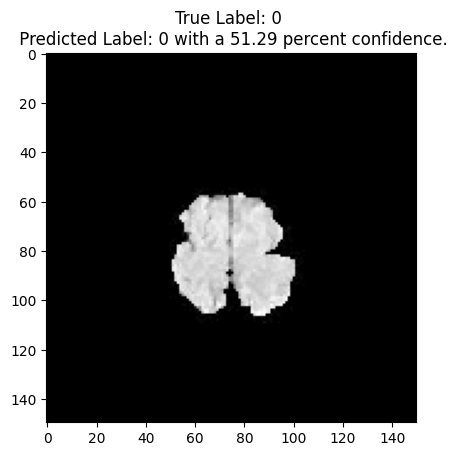

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


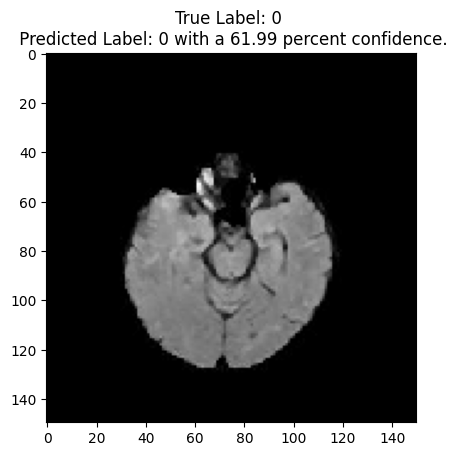

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


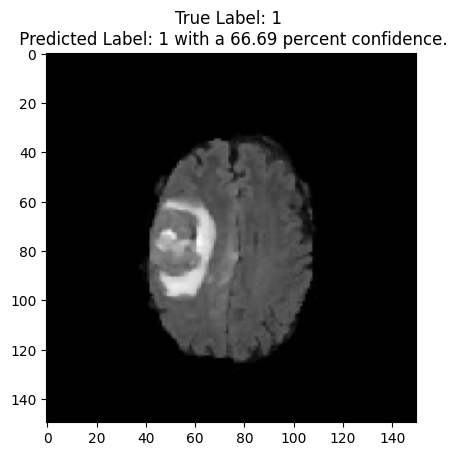

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


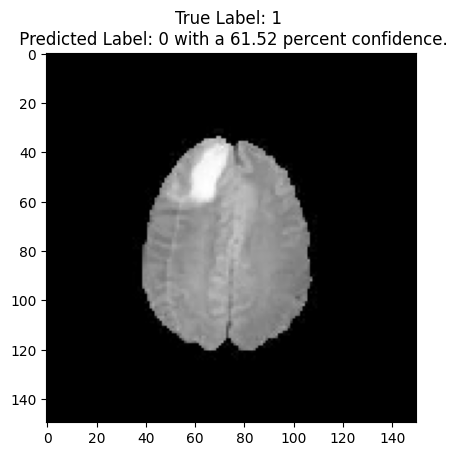

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


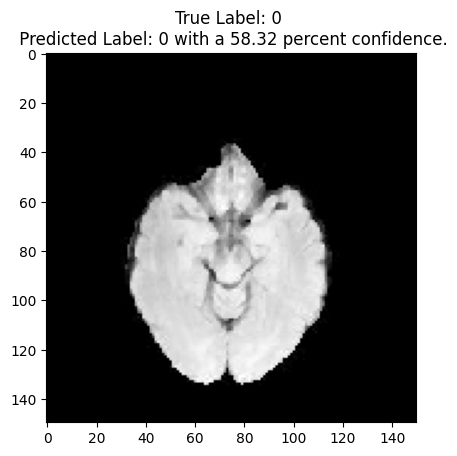

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


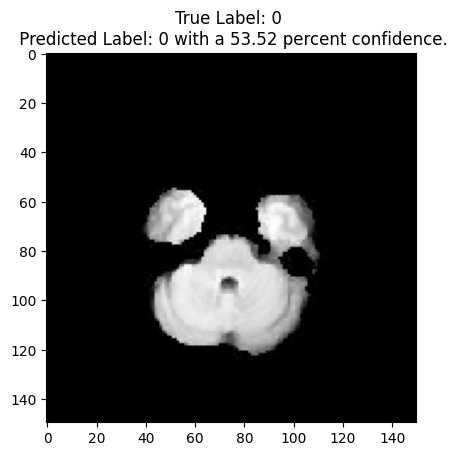

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


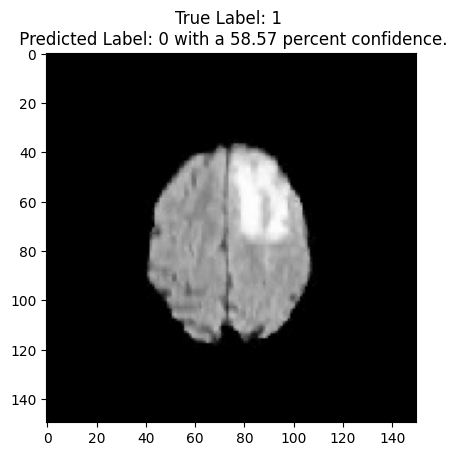

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


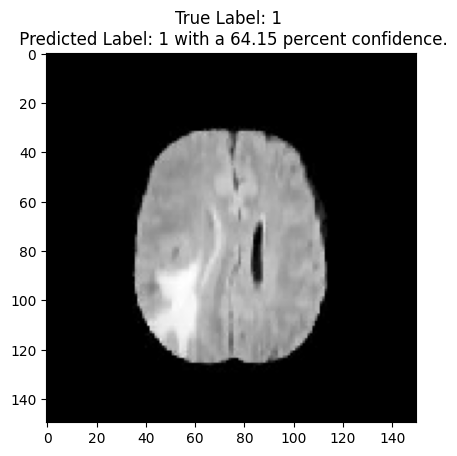

In [42]:
for vis_image, y_true in zip(X, y):
    img = image.load_img(vis_image, target_size=(150, 150))
    x = image.img_to_array(img)
    x /= 127.5
    x = np.expand_dims(x, axis=0)
    preprocess_images = np.vstack([x])
    classes = model.predict(preprocess_images, batch_size=10)
    score = tf.nn.sigmoid(classes[0])
    if classes[0]>0.5:
        predicted_label = 1
    else:
        predicted_label =0
    plt.title(f'True Label: {y_true} \n Predicted Label: {predicted_label} with a {100 * np.max(score):.2f} percent confidence.')
    plt.imshow(img)
    plt.show()

# **<span style="color:#DD3322;">12. Test on Selected images</span>**

if you have own images of MRI data, you can test it!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
 This image most likely belongs to '1' (With Tumor) at 66.67 percent confidence.


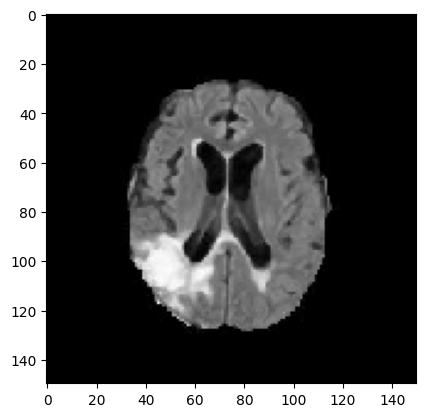

In [58]:
def make_your_prediction(YOUR_IMAGE_PATH = None):
    if YOUR_IMAGE_PATH == None:
        YOUR_IMAGE_PATH = '/kaggle/working/_MODELLING/testing/1/Image3645.jpg'
    img = image.load_img(YOUR_IMAGE_PATH, target_size=(150, 150))
    plt.imshow(img)
    x = image.img_to_array(img)
    x /= 127.5
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    score = tf.nn.sigmoid(classes[0])

    class_name = train_generator.class_indices
    class_name_inverted = {y: x for x, y in class_name.items()}

    if classes[0]>0.5:
        print(f" This image most likely belongs to '{class_name_inverted[1]}' (With Tumor) at {100 * np.max(score):.2f} percent confidence.")
    else:
        print(f" This image most likely belongs to '{class_name_inverted[0]}' (Without Tumor) at {100 * np.max(score):.2f} percent confidence.")

make_your_prediction(YOUR_IMAGE_PATH = None)